In [15]:
import calendar

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Daily Treasury Data

In [16]:
treasury = pd.read_csv('data/daily_treasury.csv')
treasury.head()

,Record Date,Type of Account,Transaction Type,Transaction Category,Transaction Category Description,Transactions Today,Transactions Month to Date,Transactions Fiscal Year to Date,Table Number,Table Name,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-04-12,Treasury General Account (TGA),Deposits,Dept of Agriculture (USDA) - misc,NaN,13,107,1885,II,Deposits and Withdrawals of Operating Cash,1,2023,3,2023,2,4,12
1,2023-04-12,Treasury General Account (TGA),Deposits,USDA - Commodity Credit Corporation,NaN,34,291,3950,II,Deposits and Withdrawals of Operating Cash,2,2023,3,2023,2,4,12
2,2023-04-12,Treasury General Account (TGA),Deposits,USDA - Federal Crop Insurance Corp Fund,NaN,0,0,2817,II,Deposits and Withdrawals of Operating Cash,3,2023,3,2023,2,4,12
3,2023-04-12,Treasury General Account (TGA),Deposits,USDA - Loan Repayments,NaN,13,143,3859,II,Deposits and Withdrawals of Operating Cash,4,2023,3,2023,2,4,12
4,2023-04-12,Treasury General Account (TGA),Deposits,Dept of Commerce (DOC),NaN,16,126,2356,II,Deposits and Withdrawals of Operating Cash,5,2023,3,2023,2,4,12


The data consists of information on daily Treausury transactions including date, account type, transaction type and category, and transaction numbers.

### Visualize and Summarize

#### Missing values

In [17]:
treasury.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142560 entries, 0 to 142559
Data columns (total 17 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Record Date                       142560 non-null  object
 1   Type of Account                   142560 non-null  object
 2   Transaction Type                  142560 non-null  object
 3   Transaction Category              142066 non-null  object
 4   Transaction Category Description  9625 non-null    object
 5   Transactions Today                142560 non-null  int64 
 6   Transactions Month to Date        142560 non-null  int64 
 7   Transactions Fiscal Year to Date  142560 non-null  int64 
 8   Table Number                      142560 non-null  object
 9   Table Name                        142560 non-null  object
 10  Source Line Number                142560 non-null  int64 
 11  Fiscal Year                       142560 non-null  int64 
 12  Fi

There are only missing values in the "Transaction Category Description" column.

#### Date

In [18]:
# convert Record Date to datetime
treasury['Record Date'] = pd.to_datetime(treasury['Record Date'], format='%Y-%m-%d')

In [19]:
# Date range
print('Date range:', 
      treasury['Record Date'].min().date(), 
      'to', 
      treasury['Record Date'].max().date())

Date range: 2018-04-13 to 2023-04-12


Five years of data are included ending 2023-04-12.

#### Type of Account

In [20]:
# Type counts
type_counts = treasury['Type of Account'].value_counts()
print('Number of types of accounts:', len(type_counts))
print('\n')
print(type_counts)

# Convert to category
treasury['Type of Account'] = treasury['Type of Account'].astype('category')

Number of types of accounts: 6


Federal Reserve Account                       76192
Treasury General Account (TGA)                63848
Short-Term Cash Investments                    2017
Treasury General Account Total Deposits         247
Treasury General Account Total Withdrawals      247
Other Withdrawals                                 9
Name: Type of Account, dtype: int64


#### Transaction Type

In [21]:
# Transaction type counts
print(treasury['Transaction Type'].value_counts())
print('\n')
print(treasury['Transaction Type'].value_counts(normalize=True))

# Convert to category
treasury['Transaction Type'] = treasury['Transaction Type'].astype('category')

Withdrawals    85906
Deposits       56654
Name: Transaction Type, dtype: int64


Withdrawals    0.602595
Deposits       0.397405
Name: Transaction Type, dtype: float64


The only transaction types are "Withdrawals" and "Deposits". About 60% of the entries are for "Withdrawals" and 40% for "Deposits".

#### Transaction Category

In [22]:
# Transaction category counts
category_counts = treasury['Transaction Category'].value_counts()
print('Number of transaction categories:', len(category_counts))
print('\n')
print(category_counts)

# Number of transactions with no category specified
print('\n')
print('Fraction of transactions with no category specified:', 
      (category_counts['Other Withdrawals'] + category_counts['Other Deposits'])/treasury.shape[0])

Number of transaction categories: 192


Other Withdrawals                                   5739
Other Deposits                                      2452
Housing and Urban Development programs              2058
Justice Department programs                         2058
Dept of Commerce (DOC)                              1718
                                                    ... 
Military Active Duty Pay (EFT)                         1
Interntl Security Assistance (DSCA)                    1
Federal Crop Ins. Corp.                                1
Agriculture                                            1
ShTransfersCtohFederalmReserve Account (Table V)       1
Name: Transaction Category, Length: 192, dtype: int64


Fraction of transactions with no category specified: 0.057456509539842875


There are 190 transaction categories not including "Other Withdrawals" and "Other Deposits" which are basically unspecified categories. "Other Withdrawals" or "Other Deposits" are used for about 5.7% of the data.

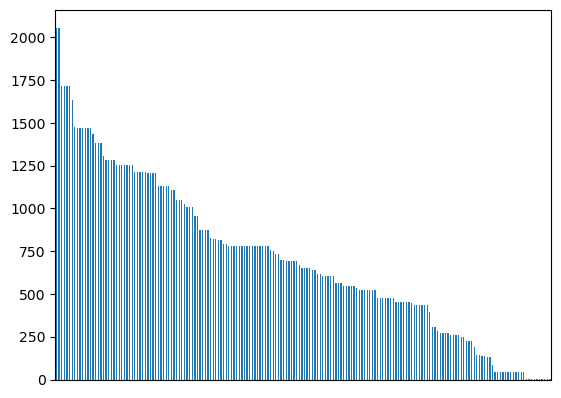

In [23]:
# Plot the transaction category counts
category_counts[2:].plot(kind='bar', xticks=[]);

#### Transaction Counts

Minimum number of transactions per day: 13505
Maximum number of transactions per day: 1583265
Median number of transactions per day: 157451.0


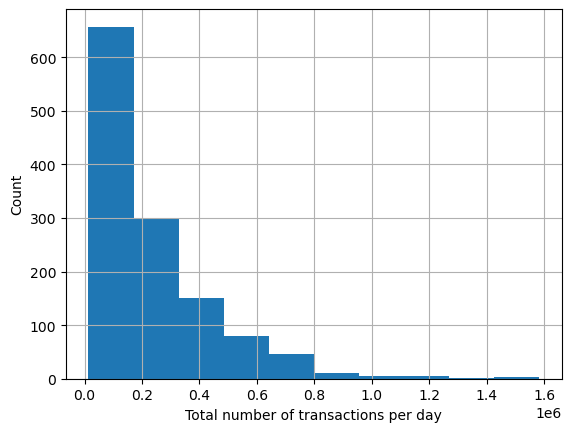

In [24]:
# Group by date and sum over Transactions Today
transcation_counts = pd.DataFrame(treasury.groupby('Record Date')['Transactions Today'].sum())
transcation_counts.reset_index(inplace=True)

# Histogram of transactions per day
transcation_counts['Transactions Today'].hist();
plt.xlabel('Total number of transactions per day')
plt.ylabel('Count');

# Minimum and maximum number of transactions per day
print('Minimum number of transactions per day:', transcation_counts['Transactions Today'].min())
print('Maximum number of transactions per day:', transcation_counts['Transactions Today'].max())

# Median number of transactions per day
print('Median number of transactions per day:', transcation_counts['Transactions Today'].median())

The total number of transactions per day varies widely from about 13,000 up to about 1.5 million, but the distribution is right skewed and the median number of transactions is 157,451.

In [25]:
# Add month and year columns to transcation_counts
transcation_counts['Month'] = transcation_counts['Record Date'].dt.month
transcation_counts['Year'] = transcation_counts['Record Date'].dt.year

# Group by month and year and sum
transcation_counts_year_month = \
    transcation_counts.groupby(['Year', 'Month'])['Transactions Today'].sum()
transcation_counts_year_month = transcation_counts_year_month.reset_index()
transcation_counts_year_month.rename(
    columns={'Transactions Today': 'Total Transactions'}, inplace=True)

Minimum average number of transactions per month: 4056869 in Oct
Maximum average number of transactions per month: 4984250 in Mar


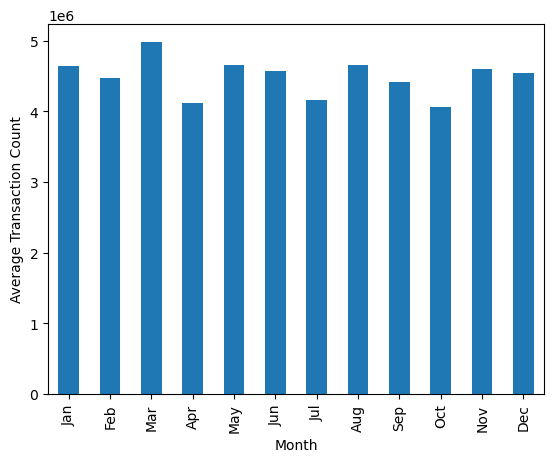

In [26]:
# Average number of transactions for each month
transcation_counts_month = \
    transcation_counts_year_month.groupby('Month')['Total Transactions'].mean()
transcation_counts_month = pd.DataFrame(transcation_counts_month)
transcation_counts_month.reset_index(inplace=True)
transcation_counts_month.rename(
    columns={'Total Transactions': 'Average Transaction Count'}, inplace=True)
transcation_counts_month['Month'] = [
    calendar.month_abbr[i] for i in transcation_counts_month['Month']]
transcation_counts_month

# Plot total transactions per month
transcation_counts_month.plot(
    kind='bar', 
    x='Month', y='Average Transaction Count', 
    ylabel='Average Transaction Count', legend=None);

# Minimum average number of transactions per month
ind = transcation_counts_month['Average Transaction Count'].argmin()
print('Minimum average number of transactions per month:', 
      round(transcation_counts_month['Average Transaction Count'].iloc[ind]), 
      'in', 
      transcation_counts_month['Month'].iloc[ind])

# Maximum average number of transactions per month
ind = transcation_counts_month['Average Transaction Count'].argmax()
print('Maximum average number of transactions per month:',
      round(transcation_counts_month['Average Transaction Count'].iloc[ind]),
      'in',
      transcation_counts_month['Month'].iloc[ind])

The distribution of the average transaction counts in a month is failry uniform. The minimum average number of transactions per month is about 4 million in October and the maximum average number of transactions per month is about 5 million in March.

   Year  Total Transactions  Total Transactions Relative to 2019
1  2019            32848981                             1.000000
2  2020            49927375                             1.519906
3  2021            51588309                             1.570469
4  2022            86101698                             2.621138


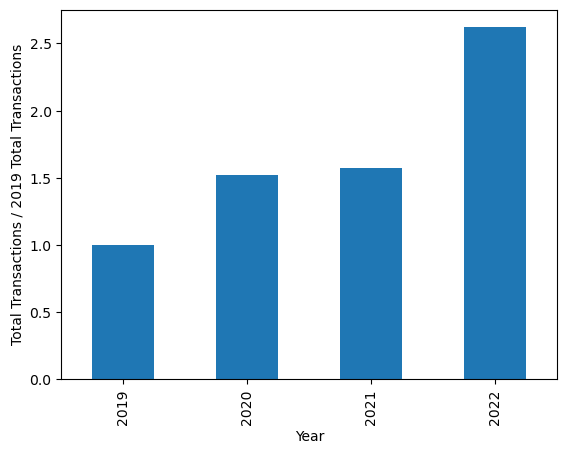

In [27]:
# Number of transactions for each year
transcation_counts_year = \
    transcation_counts_year_month.groupby('Year')['Total Transactions'].sum()
transcation_counts_year = pd.DataFrame(transcation_counts_year)
transcation_counts_year.reset_index(inplace=True)

# Plot total transactions per year relative to 2019
transcation_counts_year['Total Transactions Relative to 2019'] = transcation_counts_year['Total Transactions']/transcation_counts_year['Total Transactions'].iloc[1]

transcation_counts_year.iloc[1:-1].plot(
    kind='bar', x='Year', y='Total Transactions Relative to 2019', 
    ylabel='Total Transactions / 2019 Total Transactions', legend=None);

print(transcation_counts_year.iloc[1:-1])

The above plot is for the calendar years where there is data for the whole year and shows that the total number of transactions increases every year. The total number of transactions increased by about 1.5 times in 2020 and 2021 compared to 2019. The total number of transactions increased by about 2.6 times in 2022 compared to 2019.

/tmp/ipykernel_224396/3450268160.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  treasury['Type of Account Abbr'] = treasury['Type of Account Abbr'].str.replace(


,Type of Account Abbr,Median Daily Transaction Count
0,Short-Term Cash Invest,0
1,Treasury General (TG),13
2,Fed Reserve,50
3,Other Withdrawals,103
4,TG Total Deposits,47251
5,TG Total Withdrawals,59099


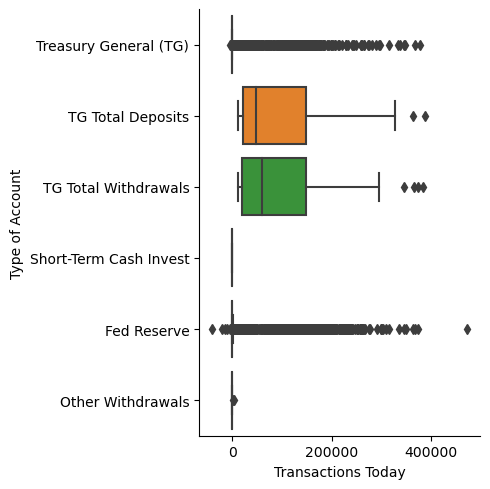

In [28]:
# Abbreviate the account types for plotting
treasury['Type of Account Abbr'] = treasury['Type of Account']
treasury['Type of Account Abbr'] = treasury['Type of Account Abbr'].str.replace(
    'Federal Reserve Account', 'Fed Reserve')
treasury['Type of Account Abbr'] = treasury['Type of Account Abbr'].str.replace(
    'Short-Term Cash Investments', 'Short-Term Cash Invest')
treasury['Type of Account Abbr'] = treasury['Type of Account Abbr'].str.replace(
    'Treasury General Account \(TGA\)', 'Treasury General (TG)')
treasury['Type of Account Abbr'] = treasury['Type of Account Abbr'].str.replace(
    'Treasury General Account Total Deposits', 'TG Total Deposits')
treasury['Type of Account Abbr'] = treasury['Type of Account Abbr'].str.replace(
    'Treasury General Account Total Withdrawals', 'TG Total Withdrawals')

# Box plots for the numbers of transactions for each type of account
sns.catplot(
    data=treasury, 
    x="Transactions Today", y="Type of Account Abbr", 
    kind="box")
plt.ylabel('Type of Account')
plt.xticks([0, 200000, 400000]);

# Median number of transactions for each type of account
median_transaction_counts = \
    treasury.groupby('Type of Account Abbr')['Transactions Today'].median().sort_values()
median_transaction_counts = pd.DataFrame(median_transaction_counts)
median_transaction_counts.reset_index(inplace=True)
median_transaction_counts.rename(
    columns={'Transactions Today': 'Median Daily Transaction Count'}, inplace=True)
median_transaction_counts['Median Daily Transaction Count'] = \
    median_transaction_counts['Median Daily Transaction Count'].astype('int')
print('\n')
median_transaction_counts

The median numbers of transactions for "TG Total Withdrawals" and "TG Total Deposits" is much higher than for the other types of accounts.

### Table Number

In [29]:
treasury['Table Number'].value_counts()

II    142560
Name: Table Number, dtype: int64

All table numbers are "II".

### Summary

* Each entry in the table represents multiple transactions and the number of transactions is given in the "Transactions Today" column
* Five years of data are included ending 2023-04-12
* There are 6 types of accounts with uneven representation in the table
  * Maximum of 76192 entries for "Federal Reserve Account"
  * Minimum of 9 entries for Other Withdrawals
* Most of the transactions (not entries) have "Treasury General Account Total Deposits" or "Treasury General Account Total Withdrawals" account types
* About 60% of the table entries are of type "Withdrawals" and 40% are of type "Deposits".
* There are many different values for "Transaction Category", with many having only a few entries.
* The distribution of transaction counts across months is fairly uniform.
* The number of transactions in 2020 and 2021 is about 1.5 times higher than in 2019 (pre-pandemic), while the number of transactions in 2022 is about 2.6 times higher than in 2019.